Health Insurance project #Company wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. A policy is recommended to a person when they land on their website, and if the person chooses to fill up a form to apply it is considered as a Positive outcome (Classified as response). All other conditions are considered Zero outcomes.

#Insurance project

Connect to dataset

In [47]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp
%matplotlib inline


#Read files:
train = pd.read_csv("F:\Metro\PY Project\Project\Train.csv")
test = pd.read_csv("F:\Metro\PY Project\Project\Test.csv")

-- Combine the datasets

In [48]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True, sort=True)
print (train.shape, test.shape, data.shape)


(50882, 15) (21805, 14) (72687, 15)


-- Find the top 10 records

In [3]:
data.head(10)

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age,source
0,Rented,C3,X1,14+,3.0,1,No,36,Individual,22,11628.0,3213,0.0,36,train
1,Owned,C5,X2,NaN,NaN,2,No,22,Joint,22,30510.0,1117,0.0,75,train
2,Owned,C5,NaN,1.0,1.0,3,No,32,Individual,19,7450.0,3732,1.0,32,train
3,Owned,C24,X1,14+,3.0,4,No,48,Joint,19,17780.0,4378,0.0,52,train
4,Rented,C8,X2,3.0,1.0,5,No,44,Individual,16,10404.0,2190,0.0,44,train
5,Rented,C9,X2,5.0,1.0,6,No,52,Individual,22,15264.0,1785,1.0,52,train
6,Owned,C3,NaN,NaN,NaN,7,No,28,Individual,17,10640.0,679,0.0,28,train
7,Owned,C1,X4,9.0,4.0,8,Yes,73,Joint,17,29344.0,3175,1.0,75,train
8,Owned,C15,X1,14.0,3.0,9,No,43,Joint,1,27283.2,3497,0.0,52,train
9,Owned,C1,NaN,7.0,4.0,10,Yes,26,Joint,18,21100.8,530,1.0,59,train


Find the lower 10 records

In [4]:
data.tail(10)

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age,source
72677,Owned,C6,X1,3.0,1.0,72678,No,53,Individual,20,14664.0,2990,NaN,53,test
72678,Owned,C12,X3,3.0,2.0,72679,No,41,Individual,22,11980.0,84,NaN,41,test
72679,Owned,C22,X2,11.0,4.0,72680,No,59,Individual,22,11940.0,2108,NaN,59,test
72680,Owned,C1,X1,NaN,NaN,72681,No,24,Individual,19,6600.0,340,NaN,24,test
72681,Owned,C9,X1,6.0,3.0,72682,No,21,Joint,4,27846.0,944,NaN,57,test
72682,Owned,C3,X1,4.0,1.0,72683,No,45,Individual,18,15884.0,1044,NaN,45,test
72683,Owned,C4,X5,6.0,3.0,72684,No,59,Individual,18,21390.0,266,NaN,59,test
72684,Owned,C12,X3,NaN,NaN,72685,No,74,Individual,1,17836.0,2470,NaN,74,test
72685,Rented,C10,X4,3.0,1.0,72686,No,25,Individual,19,11568.0,1676,NaN,25,test
72686,Owned,C2,X2,14+,2.0,72687,No,73,Individual,3,23040.0,3617,NaN,73,test


In [5]:
data.describe()

,Holding_Policy_Type,ID,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
count,43833.000000,72687.000000,72687.000000,72687.000000,72687.000000,72687.000000,50882.000000,72687.000000
mean,2.439486,36344.000000,42.741632,15.122140,14194.856472,1737.573101,0.239947,44.862713
std,1.029450,20983.073845,17.304194,6.329295,6562.564815,1428.388402,0.427055,17.293563
min,1.000000,1.000000,16.000000,1.000000,2152.000000,1.000000,0.000000,18.000000
25%,1.000000,18172.500000,27.000000,12.000000,9254.000000,527.000000,0.000000,28.000000
50%,3.000000,36344.000000,40.000000,17.000000,13200.000000,1391.000000,0.000000,44.000000
75%,3.000000,54515.500000,57.000000,20.000000,18144.000000,2681.000000,0.000000,59.000000
max,4.000000,72687.000000,75.000000,22.000000,43776.000000,6194.000000,1.000000,75.000000


-- Find the missing values

In [3]:
data.apply(lambda x: sum(x.isnull()))

Accomodation_Type              0
City_Code                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
source                         0
dtype: int64

In [3]:
#Percentange of missing values 
missingrows = data.isna().sum()
for column in data.columns:
    print('Percentage of missing values in {} is {:.2f}% '.format(column,missingrows[column]/len(data)*100))
    

Percentage of missing values in Accomodation_Type is 0.00% 
Percentage of missing values in City_Code is 0.00% 
Percentage of missing values in Health Indicator is 23.00% 
Percentage of missing values in Holding_Policy_Duration is 39.70% 
Percentage of missing values in Holding_Policy_Type is 39.70% 
Percentage of missing values in ID is 0.00% 
Percentage of missing values in Is_Spouse is 0.00% 
Percentage of missing values in Lower_Age is 0.00% 
Percentage of missing values in Reco_Insurance_Type is 0.00% 
Percentage of missing values in Reco_Policy_Cat is 0.00% 
Percentage of missing values in Reco_Policy_Premium is 0.00% 
Percentage of missing values in Region_Code is 0.00% 
Percentage of missing values in Response is 30.00% 
Percentage of missing values in Upper_Age is 0.00% 
Percentage of missing values in source is 0.00% 


-- Find the Unique values

In [7]:
data.apply(lambda x: len(x.unique()))

Accomodation_Type              2
City_Code                     36
Health Indicator              10
Holding_Policy_Duration       16
Holding_Policy_Type            5
ID                         72687
Is_Spouse                      2
Lower_Age                     60
Reco_Insurance_Type            2
Reco_Policy_Cat               22
Reco_Policy_Premium         7685
Region_Code                 5538
Response                       3
Upper_Age                     58
source                         2
dtype: int64

-- Find the Frequency of items

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accomodation_Type        72687 non-null  object 
 1   City_Code                72687 non-null  object 
 2   Health Indicator         55969 non-null  object 
 3   Holding_Policy_Duration  43833 non-null  object 
 4   Holding_Policy_Type      43833 non-null  float64
 5   ID                       72687 non-null  int64  
 6   Is_Spouse                72687 non-null  object 
 7   Lower_Age                72687 non-null  int64  
 8   Reco_Insurance_Type      72687 non-null  object 
 9   Reco_Policy_Cat          72687 non-null  int64  
 10  Reco_Policy_Premium      72687 non-null  float64
 11  Region_Code              72687 non-null  int64  
 12  Response                 50882 non-null  float64
 13  Upper_Age                72687 non-null  int64  
 14  source                

In [4]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns 
                       if x not in ['ID','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts() )



Frequency of Categories for varible Accomodation_Type
Owned     40041
Rented    32646
Name: Accomodation_Type, dtype: int64

Frequency of Categories for varible City_Code
C1     12762
C2     11078
C3      6954
C4      5230
C9      3089
C6      2769
C7      2698
C8      2579
C10     2291
C5      1963
C17     1689
C15     1663
C11     1661
C16     1613
C13     1429
C20     1370
C12     1310
C19     1264
C18     1131
C14     1089
C21      984
C23      842
C24      823
C26      731
C22      713
C25      536
C29      533
C27      437
C28      394
C33      392
C32      240
C34      189
C35       89
C30       81
C36       54
C31       17
Name: City_Code, dtype: int64

Frequency of Categories for varible Health Indicator
X1    18624
X2    14848
X3     9608
X4     8185
X5     2408
X6     1794
X7      292
X8      119
X9       91
Name: Health Indicator, dtype: int64

Frequency of Categories for varible Holding_Policy_Duration
1.0     6390
14+     6227
2.0     6032
3.0     5192
4.0     3976
5.0  

# -- Data Visualization
-- Histogram

<AxesSubplot:ylabel='Accomodation_Type'>

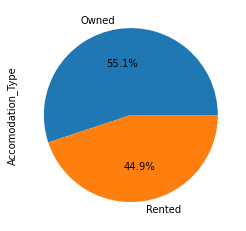

In [68]:
data['Accomodation_Type'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

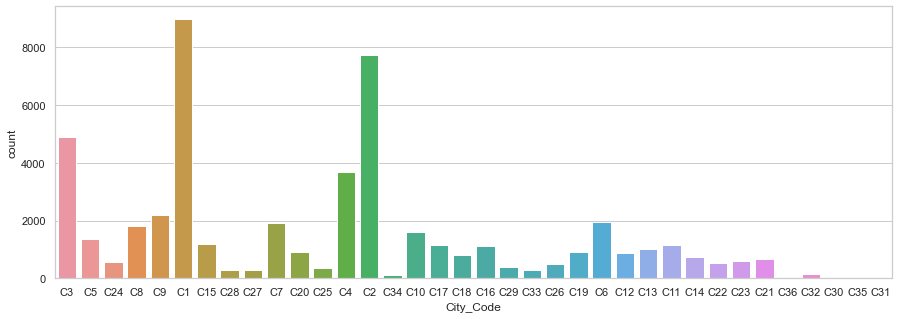

In [159]:
ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")
sns.countplot(x='City_Code', data=train);

<AxesSubplot:ylabel='City_Code'>

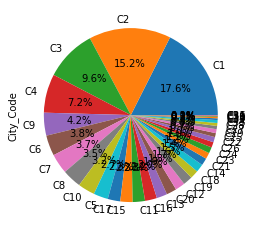

In [49]:
data['City_Code'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='Holding_Policy_Duration'>

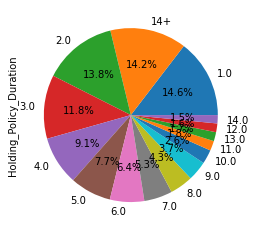

In [55]:
data['Holding_Policy_Duration'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

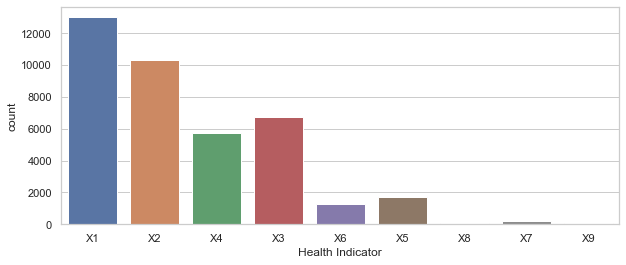

In [158]:

ax = plt.subplots(figsize=(10, 4))
sns.set_style("whitegrid")
sns.countplot(x='Health Indicator', data=train);

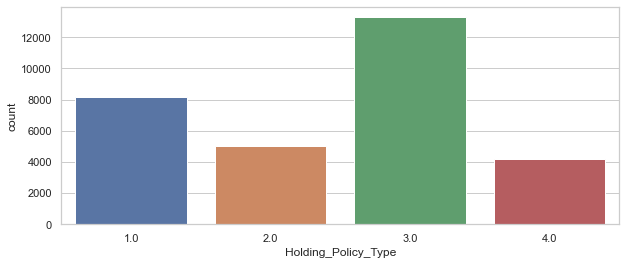

In [156]:
ax = plt.subplots(figsize=(10, 4))
sns.set_style("whitegrid")
sns.countplot(x='Holding_Policy_Type', data=train);

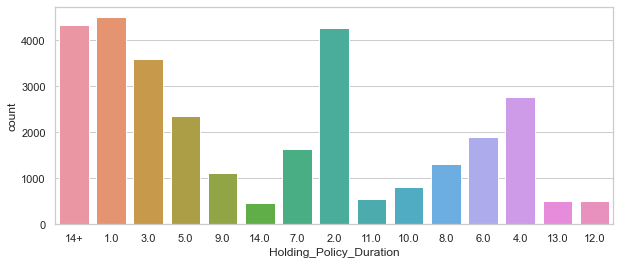

In [157]:
ax = plt.subplots(figsize=(10, 4))
sns.set_style("whitegrid")
sns.countplot(x='Holding_Policy_Duration', data=train);

<AxesSubplot:ylabel='Reco_Insurance_Type'>

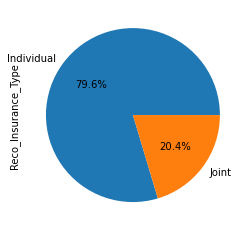

In [66]:
data['Reco_Insurance_Type'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='Is_Spouse'>

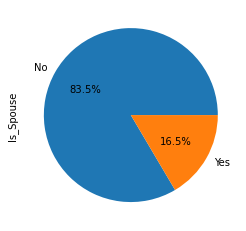

In [67]:
data['Is_Spouse'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

<AxesSubplot:>

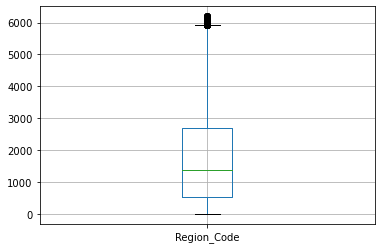

In [71]:
data.boxplot(column='Region_Code')

<AxesSubplot:ylabel='Response'>

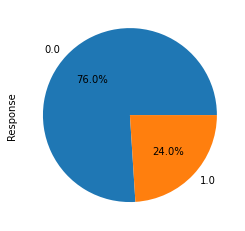

In [69]:
data['Response'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

<AxesSubplot:>

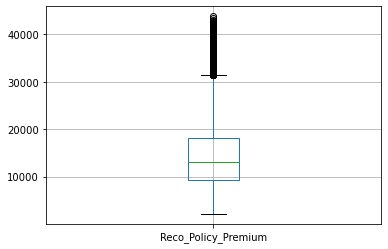

In [23]:
data.boxplot(column='Reco_Policy_Premium')

#Bivariate Analysis

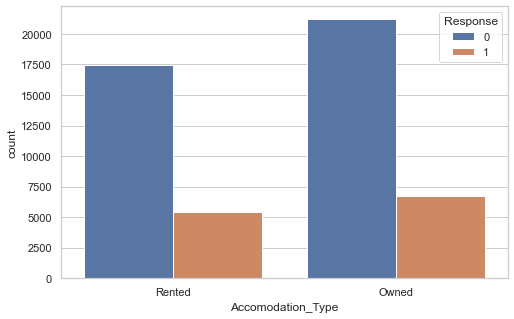

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Accomodation_Type', hue='Response', data=train);

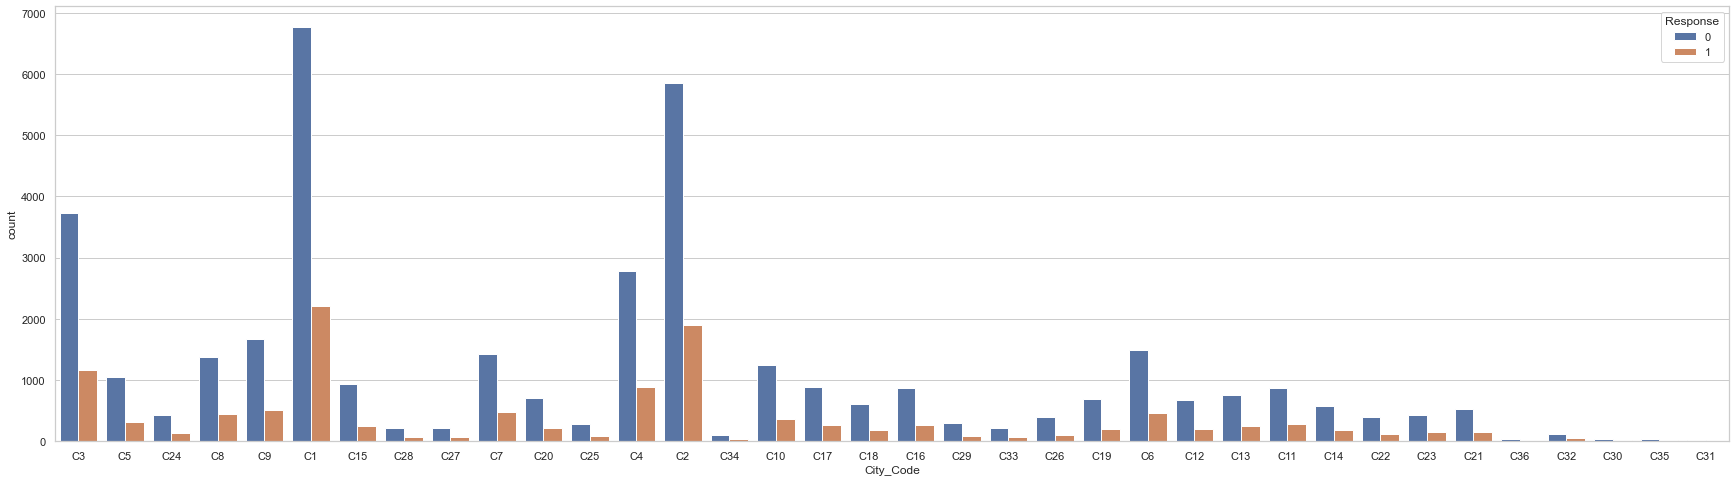

In [58]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.countplot(x='City_Code', hue='Response', data=train);


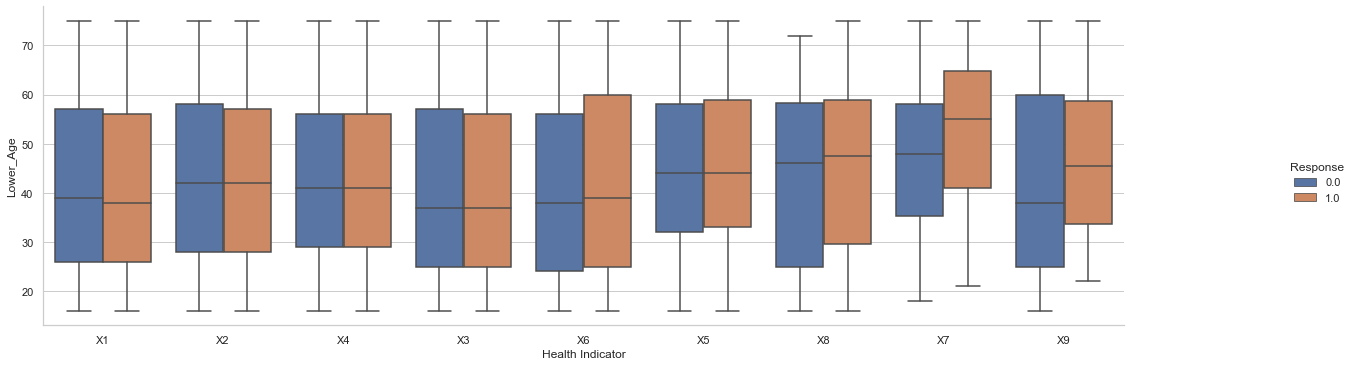

In [163]:
g= sns.catplot(x='Health Indicator', y='Lower_Age', hue='Response', kind='box', data=data);
g.fig.set_size_inches(20,5)

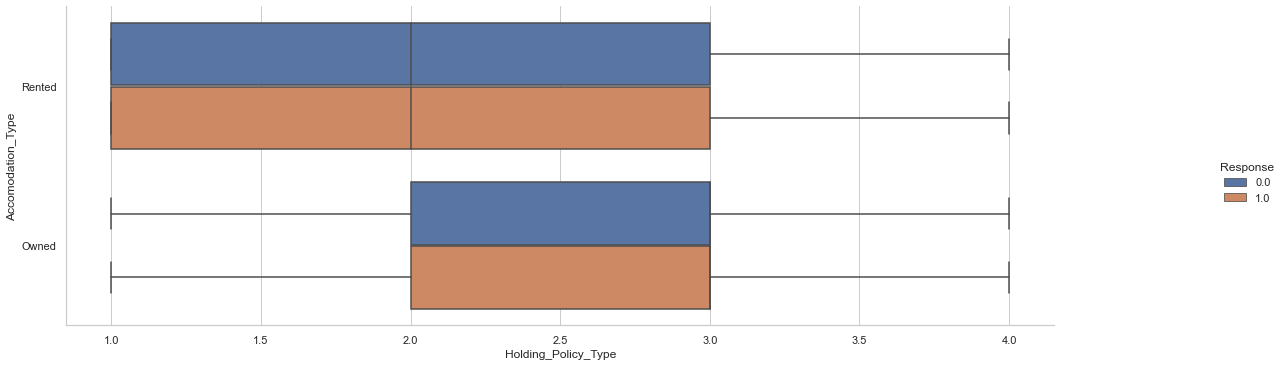

In [164]:
g= sns.catplot(x='Holding_Policy_Type', y='Accomodation_Type', hue='Response', kind='box', data=data);
g.fig.set_size_inches(20,5)

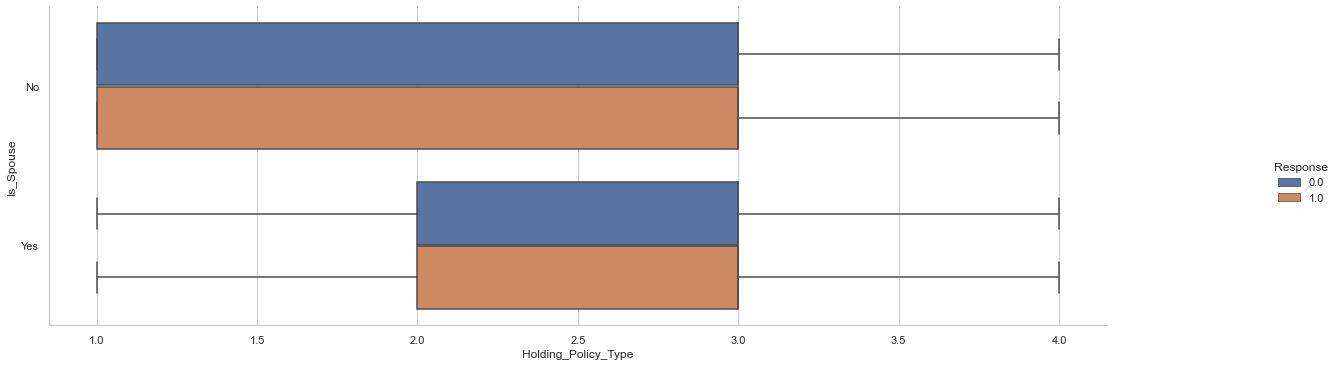

In [167]:
g= sns.catplot(x='Holding_Policy_Type', y='Is_Spouse', hue='Response', kind='box', data=data);
g.fig.set_size_inches(20,5)

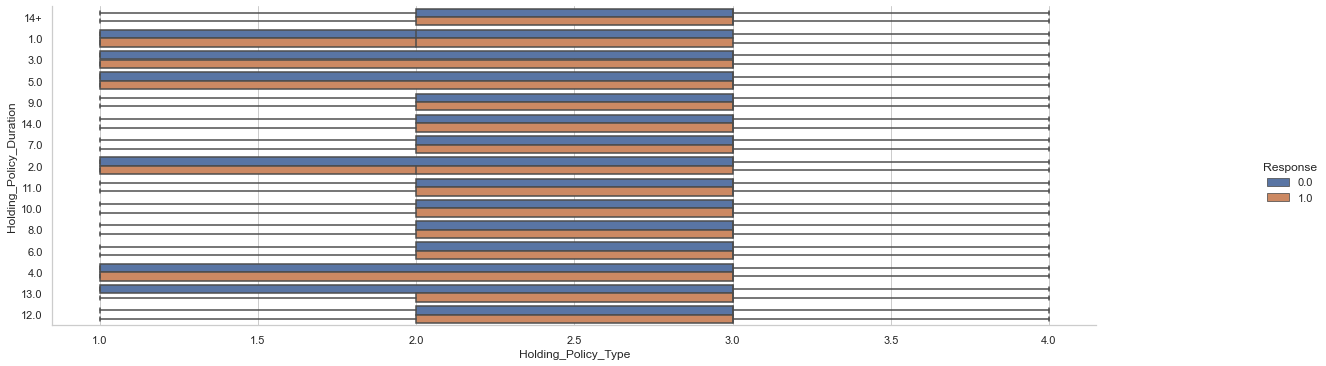

In [169]:
g= sns.catplot(x='Holding_Policy_Type', y='Holding_Policy_Duration', hue='Response', kind='box', data=data);
g.fig.set_size_inches(20,5)

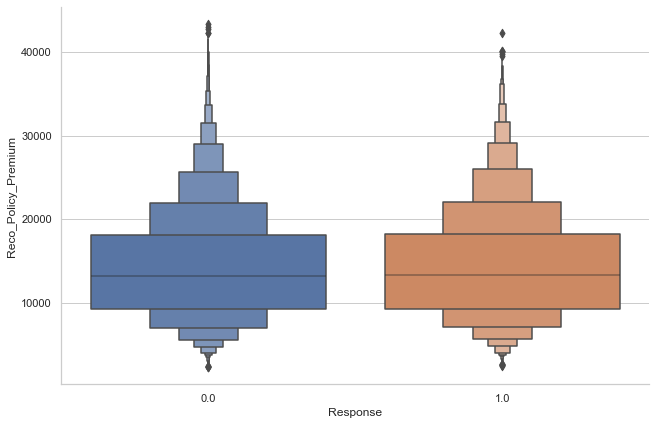

In [76]:
g = sns.catplot(x='Response', y='Reco_Policy_Premium', kind='boxen', data=data);
g.fig.set_size_inches(10,6)

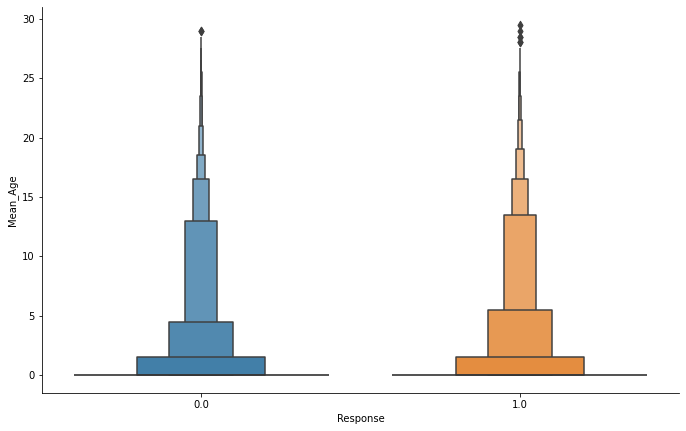

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
g = sns.catplot(x='Response', y='Mean_Age', kind='boxen', data=data);
g.fig.set_size_inches(10,6)

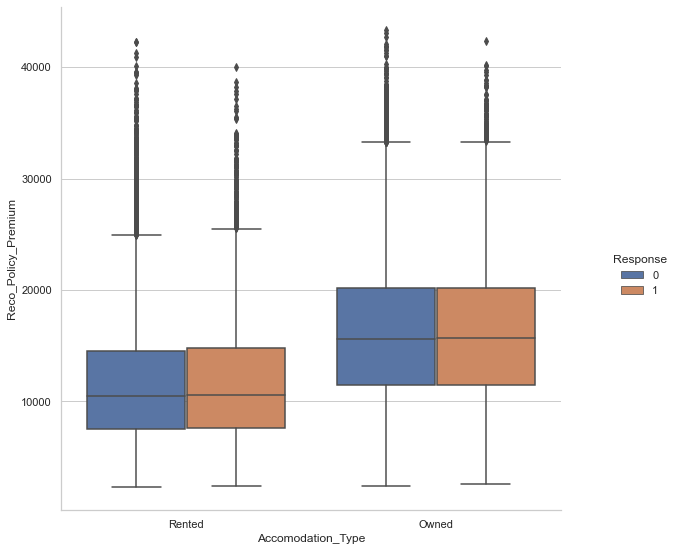

In [5]:
g = sns.catplot(x='Accomodation_Type', y='Reco_Policy_Premium', hue='Response', kind='box', data=train);
g.fig.set_size_inches(10,8)

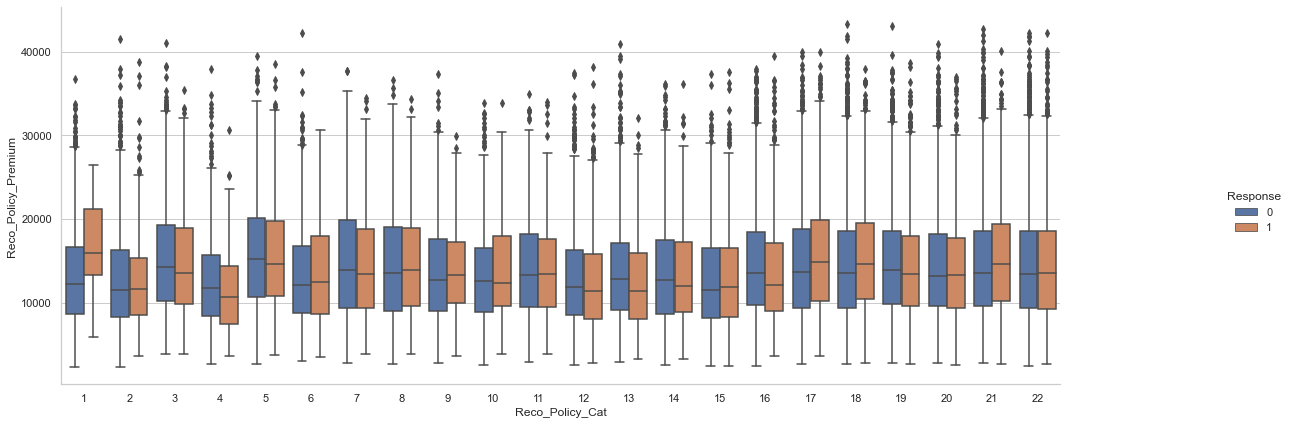

In [11]:
g = sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', hue='Response', kind='box', data=train);
g.fig.set_size_inches(20,6)

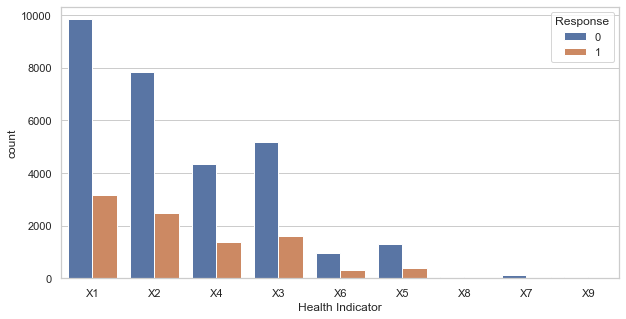

In [65]:
ax = plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")
sns.countplot(x='Health Indicator', hue='Response', data=train);

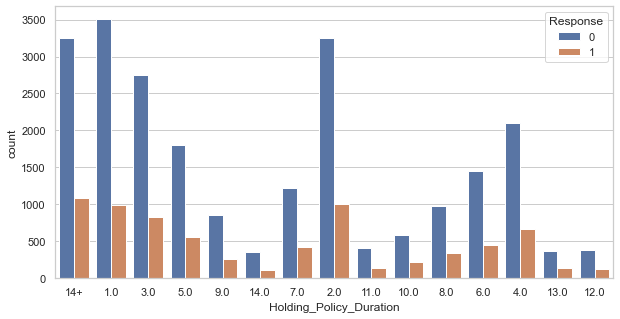

In [66]:
ax = plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")
sns.countplot(x='Holding_Policy_Duration', hue='Response', data=train);

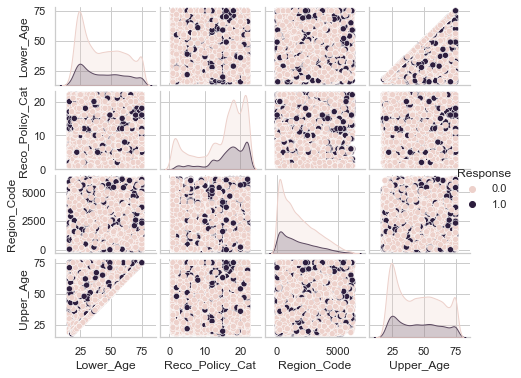

In [7]:
#Filter categorical variables
numerical_features = [x for x in data.dtypes.index if data.dtypes[x]=='int64']
#Exclude ID cols and source:
numerical_features = [x for x in numerical_features 
                       if x not in ['ID']]

g = sns.pairplot(data[numerical_features + ['Response']], hue='Response')
g.fig.set_size_inches(7,5)

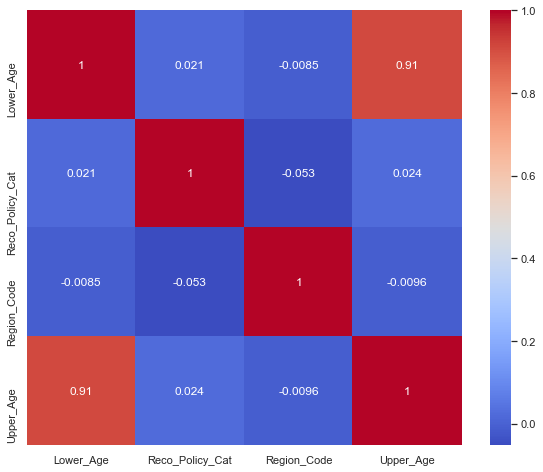

In [8]:
train_cor_spear = train[numerical_features].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(train_cor_spear, square=True, cmap='coolwarm', annot=True);

In [52]:
data['AgeGap']=data['Upper_Age']-data['Lower_Age']
NonGap = np.sum(data['AgeGap']==0)
Precetage=NonGap/data['AgeGap'].shape[0]*100
print("NonGap_Precetage:{:.2f} %".format(Precetage))

NonGap_Precetage:79.62 %


In [53]:
data['Mean_Age']=(data['Upper_Age']-data['Lower_Age'])/2

In [7]:
data['Health Indicator'].value_counts()

X1    18624
X2    14848
X3     9608
X4     8185
X5     2408
X6     1794
X7      292
X8      119
X9       91
Name: Health Indicator, dtype: int64

In [8]:
data.apply(lambda x: sum(x.isnull()))

Accomodation_Type              0
City_Code                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
source                         0
AgeGap                         0
Mean_Age                       0
dtype: int64

How should we fill the missing values?  Drop them as it exceed 40%? Assume those values are pertaining to 
non-existing customers and fill with zero? At last I decide fill it according bivariate analysis with aggerate function.


In [9]:
from scipy.stats import mode
Holding_Policy_Type_mode = data.pivot_table(values='Holding_Policy_Type',
columns=['Accomodation_Type','Is_Spouse'],aggfunc=(lambda x:mode(x).mode[0]))

print (Holding_Policy_Type_mode)

Accomodation_Type   Owned      Rented     
Is_Spouse              No  Yes     No  Yes
Holding_Policy_Type   3.0  3.0    3.0  3.0


In [10]:
data['Holding_Policy_Type'].fillna(3, inplace=True)

In [11]:
from scipy.stats import mode

#Determine the mode for each
Duration_mode = data.pivot_table(values='Holding_Policy_Duration', columns='Holding_Policy_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print ('Mode for each Holding_Policy_Type:')
print (Duration_mode)

#Get a Boolean variable specifying missing values
miss_bool = data['Holding_Policy_Duration'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Holding_Policy_Duration'] = data.loc[miss_bool,'Holding_Policy_Type'].apply(lambda x: Duration_mode[x])
print ( sum(data['Holding_Policy_Duration'].isnull()) )

Mode for each Holding_Policy_Type:
Holding_Policy_Type      1.0  2.0  3.0  4.0
Holding_Policy_Duration  1.0  1.0  14+  14+

Orignal #missing: 28854
0


In [14]:
data.apply(lambda x: sum(x.isnull()))

Accomodation_Type              0
City_Code                      0
Health Indicator           16718
Holding_Policy_Duration        0
Holding_Policy_Type            0
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
source                         0
dtype: int64

In [12]:
data['Health Indicator'].fillna(data['Health Indicator'].mode()[0], inplace=True)

In [16]:
data.apply(lambda x: sum(x.isnull()))

Accomodation_Type              0
City_Code                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
source                         0
dtype: int64

In [13]:
data['Holding_Policy_Duration']=data['Holding_Policy_Duration'].replace('14+',15.0)
data['Holding_Policy_Duration']=data['Holding_Policy_Duration'].astype(float)

In [14]:
#One Hot Coding method:
data = pd.get_dummies(data, columns=['City_Code','Is_Spouse','Accomodation_Type','Reco_Insurance_Type', 
                              'Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat'])  

In [33]:
print (data.shape)

(72687, 103)


In [34]:
# Check the data types for existing features.
data.dtypes

ID                       int64
Lower_Age                int64
Reco_Policy_Premium    float64
Region_Code              int64
Response               float64
                        ...   
Reco_Policy_Cat_18       uint8
Reco_Policy_Cat_19       uint8
Reco_Policy_Cat_20       uint8
Reco_Policy_Cat_21       uint8
Reco_Policy_Cat_22       uint8
Length: 103, dtype: object

In [15]:
#Drop the columns which have been converted to different types:
data.drop(['Upper_Age','Lower_Age','ID','AgeGap','Region_Code'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Response','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\levin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
#Data Preprocessing!
#Let's seperate the data
X = train.drop(['Response'],axis=1)
y=train.loc[:,'Response']

In [38]:
print (data.shape)
print (train.shape)
print (test.shape)

(72687, 98)
(50882, 97)
(21805, 96)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#Now let's train our model using Logistic Regression!
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(tol=.01, solver='sag')
model.fit(X_train,y_train)

LogisticRegression(solver='sag', tol=0.01)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_train = model.predict(X_train)
accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy of the model on training data is:", accuracy)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,X = X_train,y= y_train , cv = 4)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy of the model on training data is: 0.7606480051660723
Accuracy: 75.97 %


In [21]:
#Let's check our model performance on the test set!
y_pred_test = model.predict(X_test)
accuracy = accuracy_score(y_pred_test, y_test)
print("Accuracy: {:.2f} %".format(accuracy*100))
cf_matrix = confusion_matrix(y_pred_test,y_test)

Accuracy: 76.05 %


In [22]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     11591
         1.0       0.62      0.01      0.03      3674

    accuracy                           0.76     15265
   macro avg       0.69      0.51      0.44     15265
weighted avg       0.73      0.76      0.66     15265



In [142]:
X_test.dtype.names

In [145]:
train.head(2)

,Reco_Policy_Premium,Response,Mean_Age,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,11628.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,30510.0,0.0,26.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


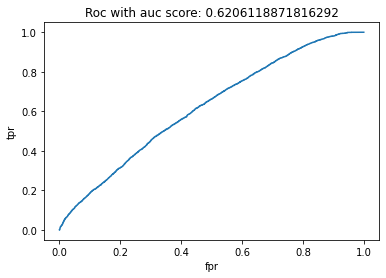

In [23]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

In [24]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()  # default no. of neighbors is 5

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.722502


In [25]:
from sklearn.ensemble import RandomForestClassifier
#Now let's train our model using RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred_train = classifier.predict(X_train)
accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy of the model on training data is:", accuracy)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train,y= y_train , cv = 4)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy of the model on training data is: 0.99907347614903
Accuracy: 72.13 %


In [27]:
# Implement adaboost using sklearn
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification
X_train,y_train = make_classification(n_samples=10000, n_features=94,
                           n_classes=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9056

In [28]:
y_pred_test = clf.predict(X_test)
accuracy = accuracy_score(y_pred_test, y_test)
print("Accuracy: {:.2f} %".format(accuracy*100))

Accuracy: 65.96 %


In [43]:
pred_Response = clf.predict(test)

In [44]:
subm=pd.DataFrame(pred_Response,index=test.index,columns={'Response'})
subm

,Response
50882,0
50883,0
50884,0
50885,0
50886,0
...,...
72682,0
72683,0
72684,0
72685,0


<AxesSubplot:ylabel='None'>

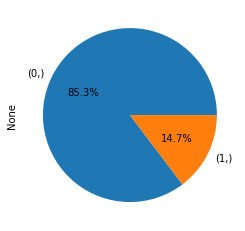

In [45]:
subm.value_counts().plot(kind = 'pie',autopct='%1.1f%%')